# A neural network to classify clothing items
The neural network will take a grayscale image and identify the type of clothing item or apparel it is ('t-shirt', 'dress', 'shoe', 'sandal', 'jeans', etc.)




## Setting up and getting the data ready
First, get the required imports before loading in the data. The Keras library in TensorFlow will be used here primarily.

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

Keras already comes with a library of 70,000 examples, including 10,000 for testing, of 28x28 pixels.

In [3]:
# Import the data from Keras, it will automatically download it for us
(train_images, train_labels), (test_images, test_labels) = keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

In [4]:
print(train_images.shape) # Verify the dimensions

(60000, 28, 28)


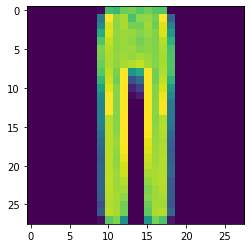

In [10]:
plt.figure()
plt.imshow(train_images[498]) # These ones look like trousers
plt.show()

In [26]:
# Define the class names
CLOTH_CLASS_NAMES = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


Pre-process the data before feeding it into the neural network: get each value into the range between 0 and 1

In [12]:
train_images = train_images / 255.0
test_images = test_images / 255.0

## Creating the model
We will use a feed-forward neural network (specifically, a Keras sequential model) with 3 layers : 1 input, 1 hidden, 1 output.

The '**softmax**' activation function for the output layer allows us to create a probability distribution function for each output class between 0 to 1 where 1 represents the chance of the input being that item.

In [14]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),  # Flatten the layer to transform a 28x28 pixel image into 784 neurons
    keras.layers.Dense(128, activation='relu'),  # Fully connected layer with 128 neurons and rectify linear unit activation
    keras.layers.Dense(10, activation='softmax') # Fully connected output layer with 10 neurons for the 10 classes
])

We will use a stochastic gradient descent optimizer for this neural network ( 'adam'). It's an efficient algorithm that allows us to train this neural network on even a simple computer.

Sparse categorical crossentropy uses integers rather than full vectors, so it too is efficient in memory usage and computation.

For metrics, we will just monitor the accuracy over time.


In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

## Train the model
Using the data that we retrieved and our model above, we can now begin training.

In [16]:
model.fit(train_images, train_labels, epochs=10)  # Use 10 epochs

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.4964 - accuracy: 0.8256
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3708 - accuracy: 0.8664
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3340 - accuracy: 0.8783
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3085 - accuracy: 0.8880
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2925 - accuracy: 0.8923
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2777 - accuracy: 0.8962
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2665 - accuracy: 0.9014
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2539 - accuracy: 0.9061
Epoch 9/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2452 - accuracy: 0.9070
Epoch 10/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.238

## Evluate the model on the test data
Should be around 88 - 90%


In [17]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=1) 

print('Accuracy for test data:', test_acc)

313/313 [==============================] - 0s 1ms/step - loss: 0.3512 - accuracy: 0.8799
Accuracy for test data: 0.8798999786376953


Now, we  can make predictions and check it against the data.


In [18]:
# Will return the predictions as an array of arrays of predictions (with probability for each class)
preds = model.predict(test_images)

[4.0126309e-07 4.0899412e-10 7.6172385e-10 2.1640472e-09 4.4319128e-11
 1.3650031e-04 3.8341682e-08 3.8067773e-03 3.9878472e-08 9.9605632e-01]


Let's test it out by plotting the image and comparing the model's prediction against the given label.

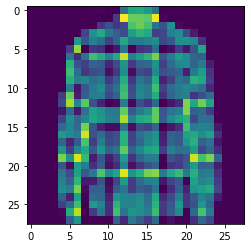

NN Prediction: Shirt
Actual value: Shirt


In [36]:
TEST_IMAGE_INDEX = 7
plt.figure()
plt.imshow(test_images[TEST_IMAGE_INDEX]) 
plt.show()
print("NN Prediction: " + CLOTH_CLASS_NAMES[np.argmax(preds[TEST_IMAGE_INDEX])])
print("Actual value: " + CLOTH_CLASS_NAMES[test_labels[TEST_IMAGE_INDEX]])
